In [ ]:
# !git clone https://github.com/finterstellar/finterstellar.git

In [ ]:
# !pip uninstall matplotlib
# !pip install matplotlib==3.1.3

In [ ]:
# !pip uninstall scikit-learn

In [ ]:
# !pip install scikit-learn==0.23.2

In [ ]:
# !pip install -U finance-datareader
# !pip install yfinance

In [ ]:
# !pip install pycaret[full] -qqq

In [ ]:
# !pip install finterstellar

In [ ]:
# ta library
# https://technical-analysis-library-in-python.readthedocs.io/en/latest/

# !pip install ta

In [ ]:
from sklearn.cluster import KMeans
import warnings, random
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler

# 데이터 준비

In [ ]:
import FinanceDataReader as fdr

korean_list = fdr.StockListing('Krx')
korean_list

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7890,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7891,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7892,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
7893,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
print(korean_list.loc[korean_list['Name'] == '아이에스동서'])

      Symbol Market    Name            Sector                      Industry  \
4779  010780  KOSPI  아이에스동서  내화, 비내화 요업제품 제조업  타일,위생도기,콘크리트파일,P.C관,침목 제조,도매   

     ListingDate SettleMonth          Representative  \
4779  1986-01-27         12월  허석헌, 정원호, 김갑진(각자 대표이사)   

                        HomePage Region  
4779  http://www.isdongseo.co.kr  서울특별시  


In [ ]:
import yfinance as yf
# 아이에스동서 = 010780  
List= yf.download('010780.KS',
                      start='2018-06-01',
                       end = '2022-01-10',
                       action='inline',
                      progress=False)

In [ ]:
data = List

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,29200.0,29450.0,28500.0,28950.0,25957.789062,89484
2018-06-04,29350.0,29600.0,28750.0,29250.0,26226.781250,54041
2018-06-05,29450.0,29450.0,28600.0,28900.0,25912.958984,93290
2018-06-07,28850.0,29350.0,28700.0,29350.0,26316.445312,39149
2018-06-08,29350.0,29550.0,28750.0,28850.0,25868.125000,44254
...,...,...,...,...,...,...
2022-01-04,45050.0,45850.0,45000.0,45750.0,45750.000000,75673
2022-01-05,45400.0,46050.0,44450.0,44450.0,44450.000000,97095
2022-01-06,44000.0,44850.0,43850.0,44600.0,44600.000000,64929


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2018-06-01 to 2022-01-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       889 non-null    float64
 1   High       889 non-null    float64
 2   Low        889 non-null    float64
 3   Close      889 non-null    float64
 4   Adj Close  889 non-null    float64
 5   Volume     889 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 48.6 KB


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,29200.0,29450.0,28500.0,28950.0,25957.789062,89484
2018-06-04,29350.0,29600.0,28750.0,29250.0,26226.781250,54041
2018-06-05,29450.0,29450.0,28600.0,28900.0,25912.958984,93290
2018-06-07,28850.0,29350.0,28700.0,29350.0,26316.445312,39149
2018-06-08,29350.0,29550.0,28750.0,28850.0,25868.125000,44254


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,45050.0,45850.0,45000.0,45750.0,45750.0,75673
2022-01-05,45400.0,46050.0,44450.0,44450.0,44450.0,97095
2022-01-06,44000.0,44850.0,43850.0,44600.0,44600.0,64929
2022-01-07,44600.0,45300.0,44000.0,44750.0,44750.0,55860
2022-01-10,45050.0,46000.0,44650.0,46000.0,46000.0,180913


In [ ]:
# Close(종가)는 삭제하고 Adj Close(수정된 종가)를 사용
data.drop(columns = ['Close'], inplace = True)
data.rename(columns = {'Adj Close' : 'Close'}, inplace = True)
# chage(변화량), chage_rate(변화율) 추가
# 변화량
data['Change'] = [data.iloc[i]['Close']-data.iloc[i-1]['Close'] for i in range(len(data))]
# 변화율
data['Change_rate'] = [(data.iloc[i]['Close']-data.iloc[i-1]['Close'])/data.iloc[i-1]['Close']*100 for i in range(len(data))]
data

,Open,High,Low,Close,Volume,Change,Change_rate
Date,,,,,,,
2018-06-01,29200.0,29450.0,28500.0,25957.789062,89484,-20042.210938,-43.570024
2018-06-04,29350.0,29600.0,28750.0,26226.781250,54041,268.992188,1.036268
2018-06-05,29450.0,29450.0,28600.0,25912.958984,93290,-313.822266,-1.196572
2018-06-07,28850.0,29350.0,28700.0,26316.445312,39149,403.486328,1.557083
2018-06-08,29350.0,29550.0,28750.0,25868.125000,44254,-448.320312,-1.703575
...,...,...,...,...,...,...,...
2022-01-04,45050.0,45850.0,45000.0,45750.000000,75673,1500.000000,3.389831
2022-01-05,45400.0,46050.0,44450.0,44450.000000,97095,-1300.000000,-2.841530
2022-01-06,44000.0,44850.0,43850.0,44600.000000,64929,150.000000,0.337458


## 각종지수 feature로 추가

In [ ]:
import pandas as pd
import numpy as np
import ta

### 볼린저 밴드

In [ ]:
# 하이밴드
# ta.volatility.bollinger_hband(close, window=20, window_dev=2, fillna=False)
data['boll_HB'] = ta.volatility.bollinger_hband(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)
data['boll_HB_signal'] = ta.volatility.bollinger_hband_indicator(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# 로우밴드
# ta.volatility.bollinger_lband(close, window=20, window_dev=2, fillna=False)
data['boll_LB'] = ta.volatility.bollinger_lband(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)
data['boll_LB_signal'] = ta.volatility.bollinger_hband_indicator(data['Close'], window=20, window_dev=2, fillna=False)

### RSI

In [ ]:
# ta.momentum.rsi(close, window=14, fillna=False) → pandas.core.series.Series
data['rsi'] = ta.momentum.rsi(data['Close'])

In [ ]:
data['rsi']

Date
2018-06-01          NaN
2018-06-04          NaN
2018-06-05          NaN
2018-06-07          NaN
2018-06-08          NaN
                ...    
2022-01-04    64.024687
2022-01-05    56.124631
2022-01-06    56.787195
2022-01-07    57.478704
2022-01-10    62.818408
Name: rsi, Length: 889, dtype: float64

In [ ]:
# 30 이하 1 70이상 -1 그 외 0
def make_rissignal(value):
    if value <= 30: 
        return 1
    elif value <= 70:
        return 0
    else:
        return -1


In [ ]:
data['rsi_signal'] = data['rsi'].apply(lambda x : make_rissignal(x))

### 단순이동 평균

In [ ]:
# 단순 이동평균 SMA (Simple Moving Average)
data['sma5'] = data['Close'].rolling(5).mean()
data['sma20'] = data['Close'].rolling(20).mean()
data['sma60'] = data['Close'].rolling(60).mean()
data['sma120'] = data['Close'].rolling(120).mean()

### WMA 가중평균

In [ ]:
# WMA 가중평균
# ta.trend.wma_indicator(close, window=9, fillna=False)
data['WMA'] = ta.trend.wma_indicator(data['Close'], window=9, fillna=False)

### EMV 단순이동

In [ ]:
# EMV 단순이동
# ta.volume.ease_of_movement(high, low, volume, window=14, fillna=False)
data['EMV'] = ta.volume.ease_of_movement(data['High'], data['Low'], data['Volume'], window=14, fillna=False)

### macd

In [ ]:
# macd
# macd = ta.trend.macd(close) 12일 지수이동평균 - 26일 지수이동평균
# macdsignal = ta.trend.macd_signal(close) MACD의 9일 지수이동평균
# ta.trend.MACD(close: pandas.core.series.Series, 
# window_slow: int = 26, window_fast: int = 12, window_sign: int = 9, fillna: bool = False)
data['macd'] = ta.trend.macd(data['Close'])
data['macdsignal'] = ta.trend.macd_signal(data['Close'])

### 모멘텀

In [ ]:
# 모멘텀 awesome_oscillator
# ta.momentum.AwesomeOscillatorIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, window1: int = 5, window2: int = 34, fillna: bool = False)
data['awesome_oscillator'] = ta.momentum.awesome_oscillator(data['High'], data['Low'], 5, 34, False )

### williams_r

In [ ]:
# williams_r
# ta.momentum.williams_r(high, low, close, lbp=14, fillna=False)
data['williams_r'] = ta.momentum.williams_r(data['High'], data['Low'], data['Close'], lbp=14, fillna=False)

## 타겟설정

In [ ]:
# 등락률 : 어제보다 올랐으면 1 그밖은 0
data['upNdown']=[1 if x>0 else 0 for x in data['Change']]
#하루전 등락
data['upNdown_1ago']=data['upNdown'].shift(1)
#이틀전 등락
data['upNdown_2ago']=data['upNdown'].shift(2)

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,sma120,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,29200.0,29450.0,28500.0,25957.789062,89484,-20042.210938,-43.570024,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2018-06-04,29350.0,29600.0,28750.0,26226.781250,54041,268.992188,1.036268,NaN,0.0,NaN,...,NaN,NaN,3.145760e+08,NaN,NaN,NaN,NaN,1,0.0,NaN
2018-06-05,29450.0,29450.0,28600.0,25912.958984,93290,-313.822266,-1.196572,NaN,0.0,NaN,...,NaN,NaN,-1.366706e+08,NaN,NaN,NaN,NaN,0,1.0,0.0
2018-06-07,28850.0,29350.0,28700.0,26316.445312,39149,403.486328,1.557083,NaN,0.0,NaN,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1,0.0,1.0
2018-06-08,29350.0,29550.0,28750.0,25868.125000,44254,-448.320312,-1.703575,NaN,0.0,NaN,...,NaN,NaN,2.259683e+08,NaN,NaN,NaN,NaN,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,45050.0,45850.0,45000.0,45750.000000,75673,1500.000000,3.389831,44971.581897,1.0,40946.886853,...,46805.487240,43840.838889,1.375986e+09,316.050011,-87.045394,810.000000,-5.797101,1,0.0,1.0
2022-01-05,45400.0,46050.0,44450.0,44450.000000,97095,-1300.000000,-2.841530,45157.669095,0.0,40954.711374,...,46715.450391,44088.843490,-2.883774e+08,370.781559,4.519997,1037.352941,-45.070423,0,1.0,0.0
2022-01-06,44000.0,44850.0,43850.0,44600.000000,64929,150.000000,0.337458,45346.782392,0.0,40940.462139,...,46625.852897,44314.028733,-1.386129e+09,421.402783,87.896554,1049.264706,-40.845070,1,0.0,1.0


In [ ]:
# 내일의 등락률 즉 내일 예측을 위해 하루를 땅김
data['Target']=data['upNdown'].shift(-1)

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,29200.0,29450.0,28500.0,25957.789062,89484,-20042.210938,-43.570024,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1.0
2018-06-04,29350.0,29600.0,28750.0,26226.781250,54041,268.992188,1.036268,NaN,0.0,NaN,...,NaN,3.145760e+08,NaN,NaN,NaN,NaN,1,0.0,NaN,0.0
2018-06-05,29450.0,29450.0,28600.0,25912.958984,93290,-313.822266,-1.196572,NaN,0.0,NaN,...,NaN,-1.366706e+08,NaN,NaN,NaN,NaN,0,1.0,0.0,1.0
2018-06-07,28850.0,29350.0,28700.0,26316.445312,39149,403.486328,1.557083,NaN,0.0,NaN,...,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1,0.0,1.0,0.0
2018-06-08,29350.0,29550.0,28750.0,25868.125000,44254,-448.320312,-1.703575,NaN,0.0,NaN,...,NaN,2.259683e+08,NaN,NaN,NaN,NaN,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,45050.0,45850.0,45000.0,45750.000000,75673,1500.000000,3.389831,44971.581897,1.0,40946.886853,...,43840.838889,1.375986e+09,316.050011,-87.045394,810.000000,-5.797101,1,0.0,1.0,0.0
2022-01-05,45400.0,46050.0,44450.0,44450.000000,97095,-1300.000000,-2.841530,45157.669095,0.0,40954.711374,...,44088.843490,-2.883774e+08,370.781559,4.519997,1037.352941,-45.070423,0,1.0,0.0,1.0
2022-01-06,44000.0,44850.0,43850.0,44600.000000,64929,150.000000,0.337458,45346.782392,0.0,40940.462139,...,44314.028733,-1.386129e+09,421.402783,87.896554,1049.264706,-40.845070,1,0.0,1.0,1.0


In [ ]:
# data=data.drop('upNdown',axis=1)
data = data.dropna()

In [ ]:
data=data[22:]

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,30750.0,31250.0,30500.0,28586.888672,27403,-279.806641,-0.969306,28834.056312,0.0,26692.872789,...,28223.170443,-2.052695e+08,161.036807,4.088780,535.441176,-117.152271,0,1.0,0.0,0.0
2019-01-02,30650.0,30750.0,29400.0,27794.103516,54234,-792.785156,-2.773247,28839.723217,0.0,26700.475416,...,28170.478255,-1.991371e+09,128.925740,29.056172,363.529412,-164.829020,0,0.0,1.0,0.0
2019-01-03,29700.0,29900.0,28600.0,26674.878906,50205,-1119.224609,-4.026842,28866.199026,0.0,26539.480661,...,27889.996137,-2.136241e+09,13.015383,25.848014,-19.264706,-161.114955,0,0.0,0.0,0.0
2019-01-04,28100.0,28950.0,28100.0,26488.339844,32672,-186.539062,-0.699306,28928.185751,0.0,26373.636710,...,27594.129080,-1.886172e+09,-92.826507,2.113110,-456.911765,-144.155073,0,0.0,0.0,1.0
2019-01-07,28200.0,29350.0,28200.0,26768.146484,32422,279.806641,1.056339,28948.063740,0.0,26282.365167,...,27386.269184,8.867436e+08,-152.372455,-28.784003,-863.235294,-136.489137,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,44550.0,44800.0,43600.0,44250.000000,102297,-450.000000,-1.006711,44369.584895,0.0,41263.883855,...,43255.449566,-1.261034e+09,109.231926,-187.819245,355.000000,-49.275362,0,1.0,0.0,1.0
2022-01-04,45050.0,45850.0,45000.0,45750.000000,75673,1500.000000,3.389831,44971.581897,1.0,40946.886853,...,43840.838889,1.375986e+09,316.050011,-87.045394,810.000000,-5.797101,1,0.0,1.0,0.0
2022-01-05,45400.0,46050.0,44450.0,44450.000000,97095,-1300.000000,-2.841530,45157.669095,0.0,40954.711374,...,44088.843490,-2.883774e+08,370.781559,4.519997,1037.352941,-45.070423,0,1.0,0.0,1.0


## 클러스터링

In [ ]:
kmeans_data = data.drop(['upNdown','upNdown_1ago','upNdown_2ago','Target'], axis=1)
kmeans = KMeans(n_clusters=8, random_state=42).fit(kmeans_data)
data['cluster'] = kmeans.predict(kmeans_data)

# pycaret

In [ ]:
from pycaret.classification import * 

In [ ]:
# Importing module and initializing setup 

clf = setup(data = data, target='Target', train_size=0.8, silent=True, use_gpu =True)

,Description,Value
0,session_id,4125
1,Target,Target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(746, 28)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# return best model based on AUC 
best = compare_models(sort = 'AUC') #default is 'Accuracy' 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.5538,0.5497,0.4992,0.5139,0.5031,0.0993,0.0999,0.017
nb,Naive Bayes,0.5269,0.5311,0.0878,0.4825,0.1433,-0.0120,-0.0092,0.010
catboost,CatBoost Classifier,0.5151,0.5279,0.3976,0.4710,0.4286,0.0130,0.0143,2.173
xgboost,Extreme Gradient Boosting,0.5182,0.5263,0.4772,0.4746,0.4753,0.0296,0.0299,0.276
gbc,Gradient Boosting Classifier,0.5301,0.5187,0.3902,0.4853,0.4306,0.0396,0.0404,0.263
lda,Linear Discriminant Analysis,0.5033,0.5124,0.2921,0.4320,0.3438,-0.0254,-0.0292,0.018
rf,Random Forest Classifier,0.5217,0.5122,0.4053,0.4784,0.4376,0.0268,0.0275,0.819
qda,Quadratic Discriminant Analysis,0.4934,0.5075,0.4242,0.4027,0.3989,-0.0222,-0.0266,0.010
ada,Ada Boost Classifier,0.5318,0.5059,0.4311,0.4915,0.4574,0.0494,0.0502,0.133
et,Extra Trees Classifier,0.4984,0.5022,0.3721,0.4394,0.4004,-0.0230,-0.0250,0.825


In [ ]:
#dt, nb, catboost

## m1

In [ ]:
m1 = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.5833  0.5826  0.5714  0.5517  0.5614  0.1648  0.1649
       1       0.5500  0.5491  0.5357  0.5172  0.5263  0.0980  0.0981
       2       0.5333  0.5312  0.5000  0.5000  0.5000  0.0625  0.0625
       3       0.6333  0.6317  0.6071  0.6071  0.6071  0.2634  0.2634
       4       0.4500  0.4461  0.4074  0.3929  0.4000 -0.1074 -0.1074
       5       0.5333  0.5387  0.5926  0.4848  0.5333  0.0759  0.0774
       6       0.5254  0.5075  0.2963  0.4706  0.3636  0.0155  0.0166
       7       0.5085  0.4977  0.3704  0.4545  0.4082 -0.0047 -0.0048
       8       0.6271  0.6186  0.5185  0.6087  0.5600  0.2400  0.2424
       9       0.5932  0.5932  0.5926  0.5517  0.5714  0.1853  0.1857
       Mean    0.5538  0.5497  0.4992  0.5139  0.5031  0.0993  0.0999
       Std     0.0535  0.0549  0.1011  0.0645  0.0792  0.1099  0.1102
Train  NaN     1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

In [ ]:
tuned_m1 = tune_model(m1,choose_better = True)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Split  Fold                                               
CV-Val 0       0.5333  0.5     0.0    0.0  0.0    0.0  0.0
       1       0.5333  0.5     0.0    0.0  0.0    0.0  0.0
       2       0.5333  0.5     0.0    0.0  0.0    0.0  0.0
       3       0.5333  0.5     0.0    0.0  0.0    0.0  0.0
       4       0.5500  0.5     0.0    0.0  0.0    0.0  0.0
       5       0.5500  0.5     0.0    0.0  0.0    0.0  0.0
       6       0.5424  0.5     0.0    0.0  0.0    0.0  0.0
       7       0.5424  0.5     0.0    0.0  0.0    0.0  0.0
       8       0.5424  0.5     0.0    0.0  0.0    0.0  0.0
       9       0.5424  0.5     0.0    0.0  0.0    0.0  0.0
       Mean    0.5403  0.5     0.0    0.0  0.0    0.0  0.0
       Std     0.0063  0.0     0.0    0.0  0.0    0.0  0.0
Train  NaN     0.5403  0.5     0.0    0.0  0.0    0.0  0.0

In [ ]:
predict_model(tuned_m1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5133,0.5151,0.5056,0.6081,0.5521,0.0291,0.0297


,Open,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma20,sma60,sma120,...,boll_LB_signal_0.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_1.0,upNdown_2ago_0.0,Target,Label,Score
0,50300.0,69583.0,680.953125,1.383401,52458.914062,45544.722656,49.297832,49001.820312,53664.722656,56283.550781,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,41700.0,50738.0,190.742188,0.479614,44281.808594,39001.335938,43.829563,41641.574219,39467.898438,32667.513672,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,31700.0,24212.0,-466.343750,-1.557631,30582.423828,27813.173828,52.522038,29197.798828,28673.939453,31059.289062,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,46100.0,74084.0,-875.511719,-1.937571,45920.167969,43090.035156,46.686138,44505.101562,46371.234375,51031.300781,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,50100.0,40691.0,-535.035156,-1.089111,50869.066406,46011.000000,45.087738,48440.035156,52574.386719,56076.429688,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26900.0,87802.0,-715.287109,-2.722327,28826.744141,24719.574219,38.697323,26773.160156,28303.304688,29137.617188,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
146,38600.0,109003.0,619.914062,1.683936,39044.371094,23481.171875,74.511116,31262.771484,28297.513672,26417.105469,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
147,30350.0,24617.0,-326.441406,-1.140067,34649.738281,27201.470703,24.701225,30925.603516,33063.015625,32342.513672,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
148,57100.0,69173.0,97.277344,0.174517,60452.167969,53918.644531,40.509995,57185.406250,59868.683594,56976.257812,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
final_m1 = finalize_model(tuned_m1)
print(final_m1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4125, splitter='best')


In [ ]:
predict_model(final_m1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Open,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma20,sma60,sma120,...,boll_LB_signal_0.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_1.0,upNdown_2ago_0.0,Target,Label,Score
0,50300.0,69583.0,680.953125,1.383401,52458.914062,45544.722656,49.297832,49001.820312,53664.722656,56283.550781,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,41700.0,50738.0,190.742188,0.479614,44281.808594,39001.335938,43.829563,41641.574219,39467.898438,32667.513672,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,31700.0,24212.0,-466.343750,-1.557631,30582.423828,27813.173828,52.522038,29197.798828,28673.939453,31059.289062,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,46100.0,74084.0,-875.511719,-1.937571,45920.167969,43090.035156,46.686138,44505.101562,46371.234375,51031.300781,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,50100.0,40691.0,-535.035156,-1.089111,50869.066406,46011.000000,45.087738,48440.035156,52574.386719,56076.429688,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26900.0,87802.0,-715.287109,-2.722327,28826.744141,24719.574219,38.697323,26773.160156,28303.304688,29137.617188,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
146,38600.0,109003.0,619.914062,1.683936,39044.371094,23481.171875,74.511116,31262.771484,28297.513672,26417.105469,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
147,30350.0,24617.0,-326.441406,-1.140067,34649.738281,27201.470703,24.701225,30925.603516,33063.015625,32342.513672,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
148,57100.0,69173.0,97.277344,0.174517,60452.167969,53918.644531,40.509995,57185.406250,59868.683594,56976.257812,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
m1_predictions = predict_model(final_m1, data=data)
m1_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,30750.0,31250.0,30500.0,28586.888672,27403,-279.806641,-0.969306,28834.056312,0.0,26692.872789,...,4.088780,535.441176,-117.152271,0,1.0,0.0,0.0,7,0.0,1.0
2019-01-02,30650.0,30750.0,29400.0,27794.103516,54234,-792.785156,-2.773247,28839.723217,0.0,26700.475416,...,29.056172,363.529412,-164.829020,0,0.0,1.0,0.0,4,0.0,1.0
2019-01-03,29700.0,29900.0,28600.0,26674.878906,50205,-1119.224609,-4.026842,28866.199026,0.0,26539.480661,...,25.848014,-19.264706,-161.114955,0,0.0,0.0,0.0,4,0.0,1.0
2019-01-04,28100.0,28950.0,28100.0,26488.339844,32672,-186.539062,-0.699306,28928.185751,0.0,26373.636710,...,2.113110,-456.911765,-144.155073,0,0.0,0.0,1.0,4,1.0,1.0
2019-01-07,28200.0,29350.0,28200.0,26768.146484,32422,279.806641,1.056339,28948.063740,0.0,26282.365167,...,-28.784003,-863.235294,-136.489137,1,0.0,0.0,0.0,6,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,44550.0,44800.0,43600.0,44250.000000,102297,-450.000000,-1.006711,44369.584895,0.0,41263.883855,...,-187.819245,355.000000,-49.275362,0,1.0,0.0,1.0,4,1.0,1.0
2022-01-04,45050.0,45850.0,45000.0,45750.000000,75673,1500.000000,3.389831,44971.581897,1.0,40946.886853,...,-87.045394,810.000000,-5.797101,1,0.0,1.0,0.0,6,0.0,1.0
2022-01-05,45400.0,46050.0,44450.0,44450.000000,97095,-1300.000000,-2.841530,45157.669095,0.0,40954.711374,...,4.519997,1037.352941,-45.070423,0,1.0,0.0,1.0,7,1.0,1.0


## m2

In [ ]:
m2 = create_model('nb')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.4833  0.4676  0.0357  0.2000  0.0606 -0.0941 -0.1612
       1       0.5667  0.5413  0.1429  0.6667  0.2353  0.0845  0.1336
       2       0.4833  0.3895  0.0357  0.2000  0.0606 -0.0941 -0.1612
       3       0.5167  0.5893  0.0714  0.4000  0.1212 -0.0235 -0.0403
       4       0.5833  0.6431  0.1111  0.7500  0.1935  0.0876  0.1612
       5       0.5167  0.5174  0.1111  0.3750  0.1714 -0.0432 -0.0591
       6       0.5593  0.4907  0.0370  1.0000  0.0714  0.0401  0.1429
       7       0.5085  0.5150  0.0741  0.3333  0.1212 -0.0542 -0.0839
       8       0.5424  0.6134  0.1111  0.5000  0.1818  0.0185  0.0286
       9       0.5085  0.5440  0.1481  0.4000  0.2162 -0.0414 -0.0523
       Mean    0.5269  0.5311  0.0878  0.4825  0.1433 -0.0120 -0.0092
       Std     0.0328  0.0701  0.0409  0.2410  0.0620  0.0633  0.1145
Train  NaN     0.5419  0.5360  0.1095  0.5085  0.1802  0.0206  0.0324

In [ ]:
tuned_m2 = tune_model(m2,choose_better = True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.5000  0.3270  0.0714  0.3333  0.1176 -0.0563 -0.0891
       1       0.5167  0.4275  0.0357  0.3333  0.0645 -0.0284 -0.0613
       2       0.5167  0.4051  0.0357  0.3333  0.0645 -0.0284 -0.0613
       3       0.5333  0.5804  0.0357  0.5000  0.0667  0.0047  0.0124
       4       0.5667  0.5253  0.0370  1.0000  0.0714  0.0406  0.1439
       5       0.5833  0.5051  0.0741  1.0000  0.1379  0.0809  0.2053
       6       0.5593  0.4132  0.0370  1.0000  0.0714  0.0401  0.1429
       7       0.5254  0.5058  0.0370  0.3333  0.0667 -0.0274 -0.0577
       8       0.5254  0.5104  0.0370  0.3333  0.0667 -0.0274 -0.0577
       9       0.5254  0.5694  0.1111  0.4286  0.1765 -0.0147 -0.0214
       Mean    0.5352  0.4769  0.0512  0.5595  0.0904 -0.0016  0.0156
       Std     0.0247  0.0765  0.0246  0.2930  0.0376  0.0404  0.1018
Train  NaN     0.5403  0.4946  0.0474  0.5000  0.0867  0.0076  0.0173

In [ ]:
predict_model(tuned_m2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.4133,0.5134,0.0562,0.5556,0.102,-0.0078,-0.0194


,Open,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma20,sma60,sma120,...,boll_LB_signal_0.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_1.0,upNdown_2ago_0.0,Target,Label,Score
0,50300.0,69583.0,680.953125,1.383401,52458.914062,45544.722656,49.297832,49001.820312,53664.722656,56283.550781,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5518
1,41700.0,50738.0,190.742188,0.479614,44281.808594,39001.335938,43.829563,41641.574219,39467.898438,32667.513672,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5526
2,31700.0,24212.0,-466.343750,-1.557631,30582.423828,27813.173828,52.522038,29197.798828,28673.939453,31059.289062,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5532
3,46100.0,74084.0,-875.511719,-1.937571,45920.167969,43090.035156,46.686138,44505.101562,46371.234375,51031.300781,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5429
4,50100.0,40691.0,-535.035156,-1.089111,50869.066406,46011.000000,45.087738,48440.035156,52574.386719,56076.429688,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26900.0,87802.0,-715.287109,-2.722327,28826.744141,24719.574219,38.697323,26773.160156,28303.304688,29137.617188,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5521
146,38600.0,109003.0,619.914062,1.683936,39044.371094,23481.171875,74.511116,31262.771484,28297.513672,26417.105469,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5529
147,30350.0,24617.0,-326.441406,-1.140067,34649.738281,27201.470703,24.701225,30925.603516,33063.015625,32342.513672,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5532
148,57100.0,69173.0,97.277344,0.174517,60452.167969,53918.644531,40.509995,57185.406250,59868.683594,56976.257812,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5497


In [ ]:
final_m2 = finalize_model(tuned_m2)
print(final_m2)

GaussianNB(priors=None, var_smoothing=0.1)


In [ ]:
predict_model(final_m2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.4533,0.5222,0.1573,0.6667,0.2545,0.0362,0.0602


,Open,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma20,sma60,sma120,...,boll_LB_signal_0.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_1.0,upNdown_2ago_0.0,Target,Label,Score
0,50300.0,69583.0,680.953125,1.383401,52458.914062,45544.722656,49.297832,49001.820312,53664.722656,56283.550781,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5291
1,41700.0,50738.0,190.742188,0.479614,44281.808594,39001.335938,43.829563,41641.574219,39467.898438,32667.513672,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5312
2,31700.0,24212.0,-466.343750,-1.557631,30582.423828,27813.173828,52.522038,29197.798828,28673.939453,31059.289062,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5317
3,46100.0,74084.0,-875.511719,-1.937571,45920.167969,43090.035156,46.686138,44505.101562,46371.234375,51031.300781,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5198
4,50100.0,40691.0,-535.035156,-1.089111,50869.066406,46011.000000,45.087738,48440.035156,52574.386719,56076.429688,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26900.0,87802.0,-715.287109,-2.722327,28826.744141,24719.574219,38.697323,26773.160156,28303.304688,29137.617188,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5307
146,38600.0,109003.0,619.914062,1.683936,39044.371094,23481.171875,74.511116,31262.771484,28297.513672,26417.105469,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5315
147,30350.0,24617.0,-326.441406,-1.140067,34649.738281,27201.470703,24.701225,30925.603516,33063.015625,32342.513672,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5317
148,57100.0,69173.0,97.277344,0.174517,60452.167969,53918.644531,40.509995,57185.406250,59868.683594,56976.257812,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5279


In [ ]:
m2_predictions = predict_model(final_m2, data=data)
m2_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5147,0.5021,0.1405,0.505,0.2198,0.0101,0.0145


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,30750.0,31250.0,30500.0,28586.888672,27403,-279.806641,-0.969306,28834.056312,0.0,26692.872789,...,4.088780,535.441176,-117.152271,0,1.0,0.0,0.0,7,0.0,0.5317
2019-01-02,30650.0,30750.0,29400.0,27794.103516,54234,-792.785156,-2.773247,28839.723217,0.0,26700.475416,...,29.056172,363.529412,-164.829020,0,0.0,1.0,0.0,4,0.0,0.5070
2019-01-03,29700.0,29900.0,28600.0,26674.878906,50205,-1119.224609,-4.026842,28866.199026,0.0,26539.480661,...,25.848014,-19.264706,-161.114955,0,0.0,0.0,0.0,4,0.0,0.5027
2019-01-04,28100.0,28950.0,28100.0,26488.339844,32672,-186.539062,-0.699306,28928.185751,0.0,26373.636710,...,2.113110,-456.911765,-144.155073,0,0.0,0.0,1.0,4,0.0,0.5099
2019-01-07,28200.0,29350.0,28200.0,26768.146484,32422,279.806641,1.056339,28948.063740,0.0,26282.365167,...,-28.784003,-863.235294,-136.489137,1,0.0,0.0,0.0,6,0.0,0.5208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,44550.0,44800.0,43600.0,44250.000000,102297,-450.000000,-1.006711,44369.584895,0.0,41263.883855,...,-187.819245,355.000000,-49.275362,0,1.0,0.0,1.0,4,0.0,0.5235
2022-01-04,45050.0,45850.0,45000.0,45750.000000,75673,1500.000000,3.389831,44971.581897,1.0,40946.886853,...,-87.045394,810.000000,-5.797101,1,0.0,1.0,0.0,6,0.0,0.5095
2022-01-05,45400.0,46050.0,44450.0,44450.000000,97095,-1300.000000,-2.841530,45157.669095,0.0,40954.711374,...,4.519997,1037.352941,-45.070423,0,1.0,0.0,1.0,7,0.0,0.5317


## m3

In [ ]:
m3 = create_model('catboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.5833  0.6417  0.5357  0.5556  0.5455  0.1611  0.1612
       1       0.5000  0.5413  0.3571  0.4545  0.4000 -0.0181 -0.0185
       2       0.4833  0.4554  0.3214  0.4286  0.3673 -0.0544 -0.0560
       3       0.4833  0.5112  0.4286  0.4444  0.4364 -0.0403 -0.0403
       4       0.5000  0.4994  0.3704  0.4348  0.4000 -0.0239 -0.0241
       5       0.5500  0.5668  0.5185  0.5000  0.5091  0.0940  0.0940
       6       0.4746  0.5058  0.2963  0.4000  0.3404 -0.0803 -0.0828
       7       0.4407  0.3947  0.2963  0.3636  0.3265 -0.1433 -0.1455
       8       0.4746  0.5532  0.4074  0.4231  0.4151 -0.0615 -0.0616
       9       0.6610  0.6100  0.4444  0.7059  0.5455  0.2968  0.3170
       Mean    0.5151  0.5279  0.3976  0.4710  0.4286  0.0130  0.0143
       Std     0.0620  0.0683  0.0810  0.0928  0.0759  0.1255  0.1307
Train  NaN     0.9732  0.9982  0.9599  0.9813  0.9705  0.9459  0.9461

In [ ]:
tuned_m3 = tune_model(m3,choose_better = True )

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.5667  0.6350  0.5000  0.5385  0.5185  0.1256  0.1258
       1       0.5333  0.5290  0.4643  0.5000  0.4815  0.0583  0.0584
       2       0.5167  0.5234  0.3929  0.4783  0.4314  0.0181  0.0183
       3       0.5500  0.5480  0.5000  0.5185  0.5091  0.0940  0.0940
       4       0.4333  0.4422  0.4815  0.3939  0.4333 -0.1221 -0.1246
       5       0.6833  0.6835  0.6667  0.6429  0.6545  0.3624  0.3626
       6       0.4915  0.5833  0.3704  0.4348  0.4000 -0.0363 -0.0367
       7       0.4237  0.3889  0.2963  0.3478  0.3200 -0.1745 -0.1762
       8       0.5254  0.5532  0.5556  0.4839  0.5172  0.0549  0.0554
       9       0.6102  0.6227  0.5185  0.5833  0.5490  0.2078  0.2089
       Mean    0.5334  0.5509  0.4746  0.4922  0.4815  0.0588  0.0586
       Std     0.0734  0.0838  0.0981  0.0824  0.0869  0.1476  0.1484
Train  NaN     1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

In [ ]:
predict_model(tuned_m3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.5733,0.6255,0.4607,0.7193,0.5616,0.1833,0.2008


,Open,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma20,sma60,sma120,...,boll_LB_signal_0.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_1.0,upNdown_2ago_0.0,Target,Label,Score
0,50300.0,69583.0,680.953125,1.383401,52458.914062,45544.722656,49.297832,49001.820312,53664.722656,56283.550781,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.6996
1,41700.0,50738.0,190.742188,0.479614,44281.808594,39001.335938,43.829563,41641.574219,39467.898438,32667.513672,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.7014
2,31700.0,24212.0,-466.343750,-1.557631,30582.423828,27813.173828,52.522038,29197.798828,28673.939453,31059.289062,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.7717
3,46100.0,74084.0,-875.511719,-1.937571,45920.167969,43090.035156,46.686138,44505.101562,46371.234375,51031.300781,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9454
4,50100.0,40691.0,-535.035156,-1.089111,50869.066406,46011.000000,45.087738,48440.035156,52574.386719,56076.429688,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.8410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26900.0,87802.0,-715.287109,-2.722327,28826.744141,24719.574219,38.697323,26773.160156,28303.304688,29137.617188,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6416
146,38600.0,109003.0,619.914062,1.683936,39044.371094,23481.171875,74.511116,31262.771484,28297.513672,26417.105469,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.9484
147,30350.0,24617.0,-326.441406,-1.140067,34649.738281,27201.470703,24.701225,30925.603516,33063.015625,32342.513672,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.9260
148,57100.0,69173.0,97.277344,0.174517,60452.167969,53918.644531,40.509995,57185.406250,59868.683594,56976.257812,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.8994


In [ ]:
final_m3 = finalize_model(tuned_m3)
print(final_m3)

In [ ]:
predict_model(final_m3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Open,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma20,sma60,sma120,...,boll_LB_signal_0.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_1,upNdown_1ago_1.0,upNdown_2ago_0.0,Target,Label,Score
0,50300.0,69583.0,680.953125,1.383401,52458.914062,45544.722656,49.297832,49001.820312,53664.722656,56283.550781,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.8981
1,41700.0,50738.0,190.742188,0.479614,44281.808594,39001.335938,43.829563,41641.574219,39467.898438,32667.513672,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.7976
2,31700.0,24212.0,-466.343750,-1.557631,30582.423828,27813.173828,52.522038,29197.798828,28673.939453,31059.289062,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.8019
3,46100.0,74084.0,-875.511719,-1.937571,45920.167969,43090.035156,46.686138,44505.101562,46371.234375,51031.300781,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8787
4,50100.0,40691.0,-535.035156,-1.089111,50869.066406,46011.000000,45.087738,48440.035156,52574.386719,56076.429688,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.6370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26900.0,87802.0,-715.287109,-2.722327,28826.744141,24719.574219,38.697323,26773.160156,28303.304688,29137.617188,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.8760
146,38600.0,109003.0,619.914062,1.683936,39044.371094,23481.171875,74.511116,31262.771484,28297.513672,26417.105469,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.9578
147,30350.0,24617.0,-326.441406,-1.140067,34649.738281,27201.470703,24.701225,30925.603516,33063.015625,32342.513672,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.9820
148,57100.0,69173.0,97.277344,0.174517,60452.167969,53918.644531,40.509995,57185.406250,59868.683594,56976.257812,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.9716


In [ ]:
m3_predictions = predict_model(final_m3, data=data)
m3_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9973,0.9999,0.9972,0.9972,0.9972,0.9946,0.9946


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,30750.0,31250.0,30500.0,28586.888672,27403,-279.806641,-0.969306,28834.056312,0.0,26692.872789,...,4.088780,535.441176,-117.152271,0,1.0,0.0,0.0,7,0.0,0.7829
2019-01-02,30650.0,30750.0,29400.0,27794.103516,54234,-792.785156,-2.773247,28839.723217,0.0,26700.475416,...,29.056172,363.529412,-164.829020,0,0.0,1.0,0.0,4,0.0,0.8849
2019-01-03,29700.0,29900.0,28600.0,26674.878906,50205,-1119.224609,-4.026842,28866.199026,0.0,26539.480661,...,25.848014,-19.264706,-161.114955,0,0.0,0.0,0.0,4,0.0,0.8166
2019-01-04,28100.0,28950.0,28100.0,26488.339844,32672,-186.539062,-0.699306,28928.185751,0.0,26373.636710,...,2.113110,-456.911765,-144.155073,0,0.0,0.0,1.0,4,1.0,0.7260
2019-01-07,28200.0,29350.0,28200.0,26768.146484,32422,279.806641,1.056339,28948.063740,0.0,26282.365167,...,-28.784003,-863.235294,-136.489137,1,0.0,0.0,0.0,6,0.0,0.8631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,44550.0,44800.0,43600.0,44250.000000,102297,-450.000000,-1.006711,44369.584895,0.0,41263.883855,...,-187.819245,355.000000,-49.275362,0,1.0,0.0,1.0,4,1.0,0.7975
2022-01-04,45050.0,45850.0,45000.0,45750.000000,75673,1500.000000,3.389831,44971.581897,1.0,40946.886853,...,-87.045394,810.000000,-5.797101,1,0.0,1.0,0.0,6,0.0,0.9642
2022-01-05,45400.0,46050.0,44450.0,44450.000000,97095,-1300.000000,-2.841530,45157.669095,0.0,40954.711374,...,4.519997,1037.352941,-45.070423,0,1.0,0.0,1.0,7,1.0,0.8071


# Backtesting

In [ ]:
import finterstellar as fs

In [ ]:
from finterstellar import util
from matplotlib.ticker import ScalarFormatter, FixedLocator
import matplotlib.pyplot as plt

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(15,10))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

## m1


In [ ]:
m1_predictions['Label'] = m1_predictions['Label'].astype(float)

In [ ]:
m1_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.0
mean,40531.568365,41213.605898,39903.284182,38809.264820,81931.526810,21.291293,0.091655,41576.255718,0.072386,35638.741854,...,143.807684,261.312687,-91.397451,0.485255,0.485255,0.482574,0.486595,3.859249,0.486595,1.0
std,11219.524513,11335.412197,11047.403318,11267.960247,60659.489245,890.432849,2.575063,11763.742928,0.259300,10838.715629,...,1041.097323,2854.152459,40.249043,0.500118,0.500118,0.500031,0.500156,2.900178,0.500156,0.0
min,17200.000000,19500.000000,15550.000000,15497.866211,16191.000000,-5007.007812,-20.343131,24576.240338,0.000000,15855.793294,...,-1948.793069,-7079.264706,-227.087838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,31112.500000,31600.000000,30750.000000,29251.429688,44673.500000,-466.343750,-1.178300,31544.947214,0.000000,26954.710197,...,-569.600095,-1634.852941,-120.177885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,38425.000000,38975.000000,37875.000000,36073.250000,65362.500000,0.000000,0.000000,37858.151329,0.000000,31728.678071,...,-44.226522,-182.279412,-90.961581,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.0
75%,49300.000000,50275.000000,48487.500000,47620.887695,96764.750000,419.710938,1.118660,51463.910524,0.000000,44372.998624,...,691.029660,1698.198529,-58.079727,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.0
max,68400.000000,69400.000000,67000.000000,66441.500000,533331.000000,4572.109375,22.769232,68307.383750,1.000000,60342.009834,...,3315.146938,11115.000000,-5.797101,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.0


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m1_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03    zero
2019-01-04     buy
2019-01-07    zero
              ... 
2021-12-30     buy
2022-01-04    zero
2022-01-05     buy
2022-01-06     buy
2022-01-07     buy
Name: trade, Length: 746, dtype: object

In [ ]:
fs.position(m1_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zz
2019-01-04    zl
2019-01-07    lz
              ..
2021-12-30    zl
2022-01-04    lz
2022-01-05    zl
2022-01-06    ll
2022-01-07    ll
Name: position, Length: 746, dtype: object

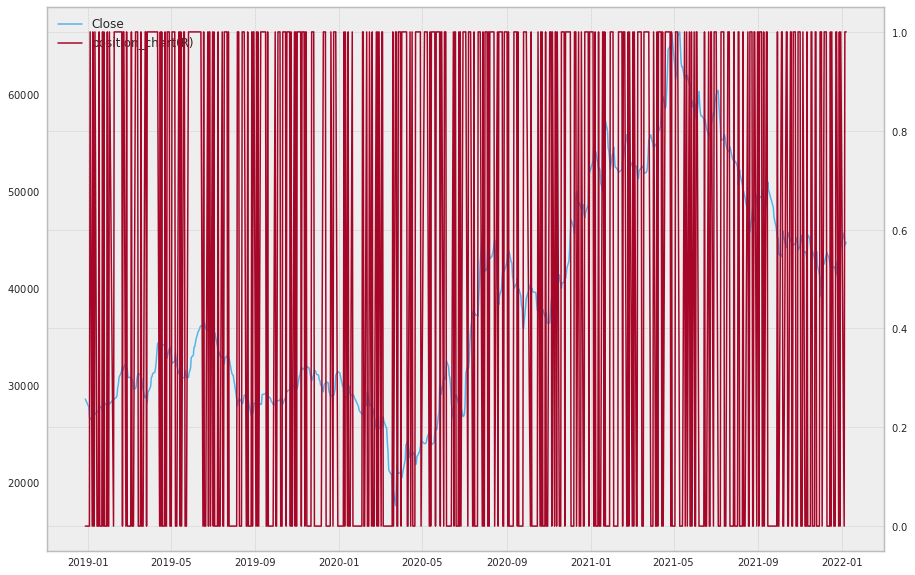

In [ ]:
draw_chart(m1_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m1_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,30750.0,31250.0,30500.0,28586.888672,27403,-279.806641,-0.969306,28834.056312,0.0,26692.872789,...,1.0,zero,,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-02,30650.0,30750.0,29400.0,27794.103516,54234,-792.785156,-2.773247,28839.723217,0.0,26700.475416,...,1.0,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,0.9967
2019-01-03,29700.0,29900.0,28600.0,26674.878906,50205,-1119.224609,-4.026842,28866.199026,0.0,26539.480661,...,1.0,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,0.9659
2019-01-04,28100.0,28950.0,28100.0,26488.339844,32672,-186.539062,-0.699306,28928.185751,0.0,26373.636710,...,1.0,buy,zl,1,1.000000,1.000000,1.000000,0.00,1.0000,0.9138
2019-01-07,28200.0,29350.0,28200.0,26768.146484,32422,279.806641,1.056339,28948.063740,0.0,26282.365167,...,1.0,zero,lz,0,1.001251,1.001251,1.001251,0.13,1.0000,0.9171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,44550.0,44800.0,43600.0,44250.000000,102297,-450.000000,-1.006711,44369.584895,0.0,41263.883855,...,1.0,buy,zl,1,1.000000,1.000000,2.512691,151.27,0.8538,0.6513
2022-01-04,45050.0,45850.0,45000.0,45750.000000,75673,1500.000000,3.389831,44971.581897,1.0,40946.886853,...,1.0,zero,lz,0,1.008898,1.008898,2.535048,153.50,0.8614,0.6586
2022-01-05,45400.0,46050.0,44450.0,44450.000000,97095,-1300.000000,-2.841530,45157.669095,0.0,40954.711374,...,1.0,buy,zl,1,1.000000,1.000000,2.535048,153.50,0.8614,0.6637


In [ ]:
# 무위험 수익률
fs.performance(m1_predictions, rf_rate=0.02)

CAGR: 35.14%
Accumulated return: 149.04%
Average return: 0.63%
Benchmark return : 45.04%
Number of trades: 177
Number of win: 74
Hit ratio: 41.81%
Investment period: 3.0yrs
Sharpe ratio: 0.92
MDD: -27.58%
Benchmark MDD: -56.12%


## m2

In [ ]:
m2_predictions['Label'] = m2_predictions['Label'].astype(float)

In [ ]:
m2_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,40531.568365,41213.605898,39903.284182,38809.264820,81931.526810,21.291293,0.091655,41576.255718,0.072386,35638.741854,...,143.807684,261.312687,-91.397451,0.485255,0.485255,0.482574,0.486595,3.859249,0.135389,0.528568
std,11219.524513,11335.412197,11047.403318,11267.960247,60659.489245,890.432849,2.575063,11763.742928,0.259300,10838.715629,...,1041.097323,2854.152459,40.249043,0.500118,0.500118,0.500031,0.500156,2.900178,0.342368,0.027810
min,17200.000000,19500.000000,15550.000000,15497.866211,16191.000000,-5007.007812,-20.343131,24576.240338,0.000000,15855.793294,...,-1948.793069,-7079.264706,-227.087838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500300
25%,31112.500000,31600.000000,30750.000000,29251.429688,44673.500000,-466.343750,-1.178300,31544.947214,0.000000,26954.710197,...,-569.600095,-1634.852941,-120.177885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.520725
50%,38425.000000,38975.000000,37875.000000,36073.250000,65362.500000,0.000000,0.000000,37858.151329,0.000000,31728.678071,...,-44.226522,-182.279412,-90.961581,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.528950
75%,49300.000000,50275.000000,48487.500000,47620.887695,96764.750000,419.710938,1.118660,51463.910524,0.000000,44372.998624,...,691.029660,1698.198529,-58.079727,1.000000,1.000000,1.000000,1.000000,7.000000,0.000000,0.531300
max,68400.000000,69400.000000,67000.000000,66441.500000,533331.000000,4572.109375,22.769232,68307.383750,1.000000,60342.009834,...,3315.146938,11115.000000,-5.797101,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.889800


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m2_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
              ... 
2021-12-30    zero
2022-01-04    zero
2022-01-05    zero
2022-01-06    zero
2022-01-07    zero
Name: trade, Length: 746, dtype: object

In [ ]:
fs.position(m2_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
              ..
2021-12-30    zz
2022-01-04    zz
2022-01-05    zz
2022-01-06    zz
2022-01-07    zz
Name: position, Length: 746, dtype: object

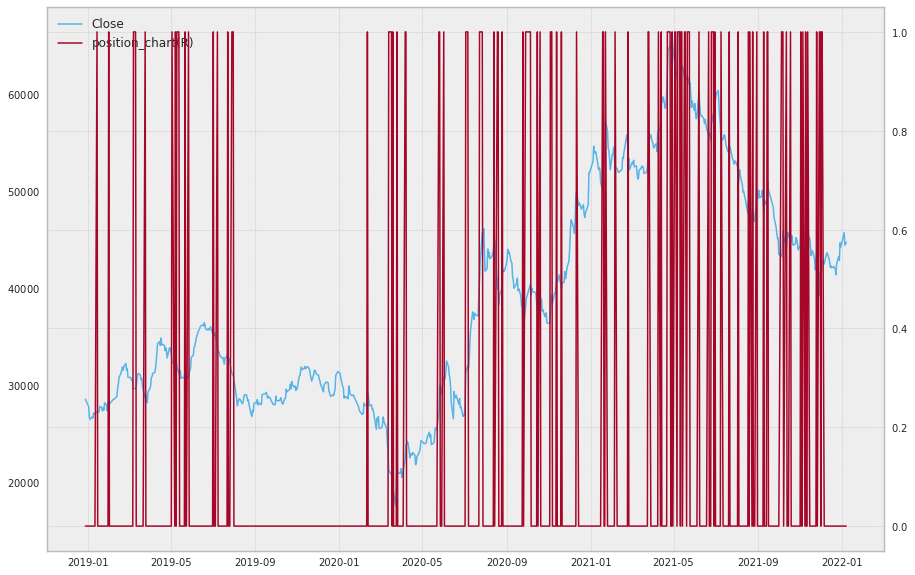

In [ ]:
draw_chart(m2_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m2_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,30750.0,31250.0,30500.0,28586.888672,27403,-279.806641,-0.969306,28834.056312,0.0,26692.872789,...,0.5317,zero,,0,1.0,1.0,1.000000,0.00,1.0,1.0000
2019-01-02,30650.0,30750.0,29400.0,27794.103516,54234,-792.785156,-2.773247,28839.723217,0.0,26700.475416,...,0.5070,zero,zz,0,1.0,1.0,1.000000,0.00,1.0,0.9967
2019-01-03,29700.0,29900.0,28600.0,26674.878906,50205,-1119.224609,-4.026842,28866.199026,0.0,26539.480661,...,0.5027,zero,zz,0,1.0,1.0,1.000000,0.00,1.0,0.9659
2019-01-04,28100.0,28950.0,28100.0,26488.339844,32672,-186.539062,-0.699306,28928.185751,0.0,26373.636710,...,0.5099,zero,zz,0,1.0,1.0,1.000000,0.00,1.0,0.9138
2019-01-07,28200.0,29350.0,28200.0,26768.146484,32422,279.806641,1.056339,28948.063740,0.0,26282.365167,...,0.5208,zero,zz,0,1.0,1.0,1.000000,0.00,1.0,0.9171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,44550.0,44800.0,43600.0,44250.000000,102297,-450.000000,-1.006711,44369.584895,0.0,41263.883855,...,0.5235,zero,zz,0,1.0,1.0,2.604286,160.43,1.0,0.6513
2022-01-04,45050.0,45850.0,45000.0,45750.000000,75673,1500.000000,3.389831,44971.581897,1.0,40946.886853,...,0.5095,zero,zz,0,1.0,1.0,2.604286,160.43,1.0,0.6586
2022-01-05,45400.0,46050.0,44450.0,44450.000000,97095,-1300.000000,-2.841530,45157.669095,0.0,40954.711374,...,0.5317,zero,zz,0,1.0,1.0,2.604286,160.43,1.0,0.6637


In [ ]:
# 무위험 수익률
fs.performance(m2_predictions, rf_rate=0.02)

CAGR: 37.15%
Accumulated return: 160.43%
Average return: 1.52%
Benchmark return : 45.04%
Number of trades: 70
Number of win: 39
Hit ratio: 55.71%
Investment period: 3.0yrs
Sharpe ratio: 1.15
MDD: -26.39%
Benchmark MDD: -56.12%


## m3

In [ ]:
m3_predictions['Label'] = m3_predictions['Label'].astype(float)

In [ ]:
m3_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,40531.568365,41213.605898,39903.284182,38809.264820,81931.526810,21.291293,0.091655,41576.255718,0.072386,35638.741854,...,143.807684,261.312687,-91.397451,0.485255,0.485255,0.482574,0.486595,3.859249,0.486595,0.837130
std,11219.524513,11335.412197,11047.403318,11267.960247,60659.489245,890.432849,2.575063,11763.742928,0.259300,10838.715629,...,1041.097323,2854.152459,40.249043,0.500118,0.500118,0.500031,0.500156,2.900178,0.500156,0.089402
min,17200.000000,19500.000000,15550.000000,15497.866211,16191.000000,-5007.007812,-20.343131,24576.240338,0.000000,15855.793294,...,-1948.793069,-7079.264706,-227.087838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.516800
25%,31112.500000,31600.000000,30750.000000,29251.429688,44673.500000,-466.343750,-1.178300,31544.947214,0.000000,26954.710197,...,-569.600095,-1634.852941,-120.177885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.779725
50%,38425.000000,38975.000000,37875.000000,36073.250000,65362.500000,0.000000,0.000000,37858.151329,0.000000,31728.678071,...,-44.226522,-182.279412,-90.961581,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.852750
75%,49300.000000,50275.000000,48487.500000,47620.887695,96764.750000,419.710938,1.118660,51463.910524,0.000000,44372.998624,...,691.029660,1698.198529,-58.079727,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.902525
max,68400.000000,69400.000000,67000.000000,66441.500000,533331.000000,4572.109375,22.769232,68307.383750,1.000000,60342.009834,...,3315.146938,11115.000000,-5.797101,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.996300


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m3_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03    zero
2019-01-04     buy
2019-01-07    zero
              ... 
2021-12-30     buy
2022-01-04    zero
2022-01-05     buy
2022-01-06     buy
2022-01-07     buy
Name: trade, Length: 746, dtype: object

In [ ]:
fs.position(m3_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zz
2019-01-04    zl
2019-01-07    lz
              ..
2021-12-30    zl
2022-01-04    lz
2022-01-05    zl
2022-01-06    ll
2022-01-07    ll
Name: position, Length: 746, dtype: object

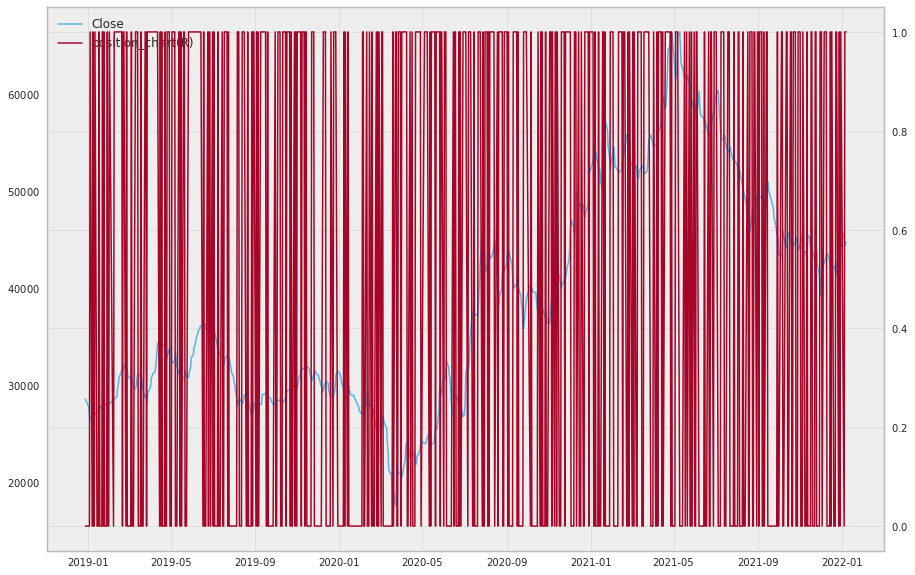

In [ ]:
draw_chart(m3_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m3_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,30750.0,31250.0,30500.0,28586.888672,27403,-279.806641,-0.969306,28834.056312,0.0,26692.872789,...,0.7829,zero,,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-02,30650.0,30750.0,29400.0,27794.103516,54234,-792.785156,-2.773247,28839.723217,0.0,26700.475416,...,0.8849,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,0.9967
2019-01-03,29700.0,29900.0,28600.0,26674.878906,50205,-1119.224609,-4.026842,28866.199026,0.0,26539.480661,...,0.8166,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,0.9659
2019-01-04,28100.0,28950.0,28100.0,26488.339844,32672,-186.539062,-0.699306,28928.185751,0.0,26373.636710,...,0.7260,buy,zl,1,1.000000,1.000000,1.000000,0.00,1.0000,0.9138
2019-01-07,28200.0,29350.0,28200.0,26768.146484,32422,279.806641,1.056339,28948.063740,0.0,26282.365167,...,0.8631,zero,lz,0,1.001251,1.001251,1.001251,0.13,1.0000,0.9171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,44550.0,44800.0,43600.0,44250.000000,102297,-450.000000,-1.006711,44369.584895,0.0,41263.883855,...,0.7975,buy,zl,1,1.000000,1.000000,2.469101,146.91,0.8538,0.6513
2022-01-04,45050.0,45850.0,45000.0,45750.000000,75673,1500.000000,3.389831,44971.581897,1.0,40946.886853,...,0.9642,zero,lz,0,1.008898,1.008898,2.491070,149.11,0.8614,0.6586
2022-01-05,45400.0,46050.0,44450.0,44450.000000,97095,-1300.000000,-2.841530,45157.669095,0.0,40954.711374,...,0.8071,buy,zl,1,1.000000,1.000000,2.491070,149.11,0.8614,0.6637


In [ ]:
# 무위험 수익률
fs.performance(m3_predictions, rf_rate=0.02)

CAGR: 34.36%
Accumulated return: 144.72%
Average return: 0.62%
Benchmark return : 45.04%
Number of trades: 176
Number of win: 74
Hit ratio: 42.05%
Investment period: 3.0yrs
Sharpe ratio: 0.90
MDD: -27.42%
Benchmark MDD: -56.12%
